In [1]:
# thanks to https://www.kaggle.com/arbazkhan971/invasive-ductal-carcinoma-classification-89-acc/notebook
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from images_path import images_path
import os
import pandas as pd
import numpy as np

In [2]:
import torch
if torch.cuda.is_available():
    print('PyTorch found cuda')
else:
    print('PyTorch could not find cuda')

PyTorch found cuda


In [3]:
# setting up path for training data
path = Path(images_path)
pattern = r'([^/_]+).png$'
fnames = get_files(path, recurse=True)
tfms = get_transforms(flip_vert=True, max_warp=0., max_zoom=0., max_rotate=0.)
path.ls()

[WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10253'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10254'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10255'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10256'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10257'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10258'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10259'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10260'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10261'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10262'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10264'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10268'),
 WindowsPath('C:/Users/Joseph/Desktop/oncoiq/breast_histopathology/10269'),
 WindowsPath

In [4]:
# Data loading for training
np.random.seed(40)
data = ImageDataBunch.from_name_re(path, fnames, pattern, ds_tfms=tfms, size=50, bs=64, num_workers=4).normalize()

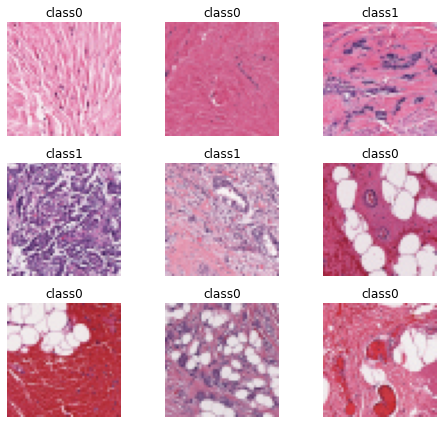

In [5]:
# data exploration
data.show_batch(rows=3, figsize=(7, 6), recompute_scale_factor=True)

In [6]:
# print data
print(data.classes)
len(data.classes)
data.c

['class0', 'class1']


2

In [7]:
data

ImageDataBunch;

Train: LabelList (444039 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: CategoryList
class0,class0,class0,class0,class0
Path: C:\Users\Joseph\Desktop\oncoiq\breast_histopathology;

Valid: LabelList (111009 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: CategoryList
class0,class1,class0,class0,class0
Path: C:\Users\Joseph\Desktop\oncoiq\breast_histopathology;

Test: None

In [8]:
# create model
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir=Path('../kaggle/working'), path=Path("."))

In [9]:
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


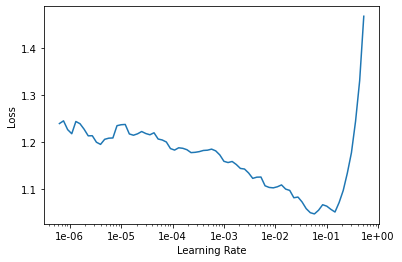

In [10]:
# find LR
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [11]:
# train model
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(1,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.305593,2.444726,0.879739,09:01


In [12]:
# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.290639,2.611153,0.876487,08:32


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


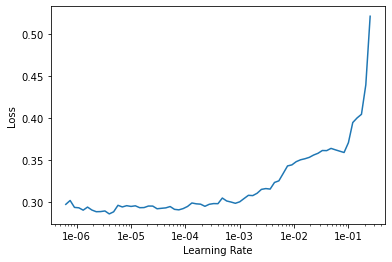

In [13]:
# hyper parameter tuning
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(1, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.254519,0.299674,0.892847,08:40


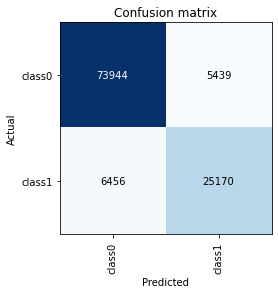

In [15]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
learn.export()
learn.model_dir = "/kaggle/working"
learn.save("stage-1", return_path=True)

WindowsPath('/kaggle/working/stage-1.pth')